In [1]:
from pathlib import Path
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data with relative path
script_dir = Path.cwd()
data_file = script_dir.parent / "data/processed_data_heidelberg.csv"
data = pd.read_csv(data_file)

# exlude all columns that are not numerical
data = data.select_dtypes(include=[np.number])
print(data.columns)

Index(['matchday_no', 'opponent_table_position', 'away_game', 'overtime',
       'heidelberg_win', 'opponent_points', 'heidelberg_points',
       'opponent_points_1st_quarter', 'heidelberg_points_1st_quarter',
       'opponent_points_2nd_quarter', 'heidelberg_points 2nd',
       'opponent_points_3rd_quarter', 'heidelberg_points 3rd',
       'opponent_points_4th_quarter', 'heidelberg_points_4th_quarter',
       'total_fans', 'arena_occupancy', 'field_goals_attempted',
       'field_goals_made', '2_pointer_percentage', '3_pointer_percentage',
       'free_throw_percentage', 'rebounds', 'assists', 'turnovers', 'steals',
       'fouls', 'jaworski_minutes_played', 'jaworski_points',
       'jaworski_assists', 'rest_days'],
      dtype='object')


In [6]:
print("H0: The 3_pointer_percentage of Heidelberg is the same in games that they win and lose.")

win_group = data[data["heidelberg_win"] == 1]["3_pointer_percentage"]
lose_group = data[data["heidelberg_win"] == 0]["3_pointer_percentage"]
    
t_stat, p_value = ttest_ind(win_group, lose_group, equal_var=False) 
print(f" T-statistic: {t_stat}, P-value: {p_value}")

print("Since the p-value is smaller than 0.05, we reject the null hypothesis and conclude that the 3_pointer_percentage of Heidelberg is different in games that they win and lose.")


H0: The 3_pointer_percentage of Heidelberg is the same in games that they win and lose.
 T-statistic: 3.0899550515038805, P-value: 0.008807376197425417
Since the p-value is smaller than 0.05, we reject the null hypothesis and conclude that the 3_pointer_percentage of Heidelberg is different in games that they win and lose.


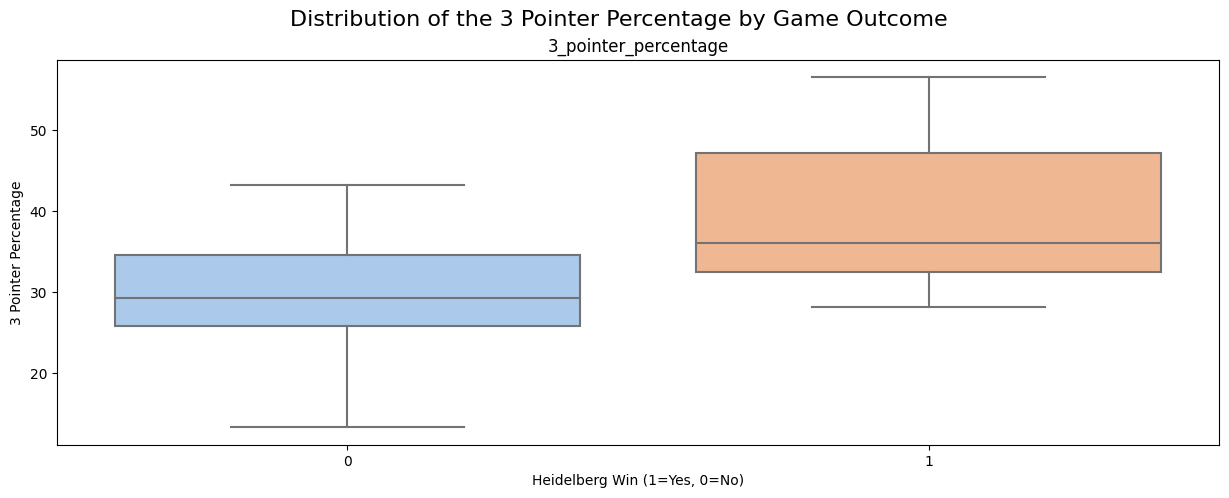

In [11]:
# Create boxplots
fig, axe = plt.subplots(1, 1, figsize=(15, 5), sharey=False)
fig.suptitle("Distribution of the 3 Pointer Percentage by Game Outcome", fontsize=16)

# Boxplot for jackson_points
sns.boxplot(x="heidelberg_win", y="3_pointer_percentage", data=data, palette="pastel")
axe.set_title("3_pointer_percentage")
axe.set_xlabel("Heidelberg Win (1=Yes, 0=No)")
axe.set_ylabel("3 Pointer Percentage")

# Adjust layout and show plot
plt.show()
